House Prices: EDA and DecisionTreeRegessor Implementation

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import visuals as vs
%matplotlib inline

C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# read in the training and test data
train = pd.read_csv('houseTrain.csv')
test = pd.read_csv('houseTest.csv')

In [3]:
#print train.head()
print np.shape(train)
#print test.head()
print np.shape(test)
prices = train.SalePrice

(1460, 81)
(1459, 80)


In [4]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.nanmean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Iowa housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Iowa housing dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


C:\Users\jmaxi.LSUMC-MASTER\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


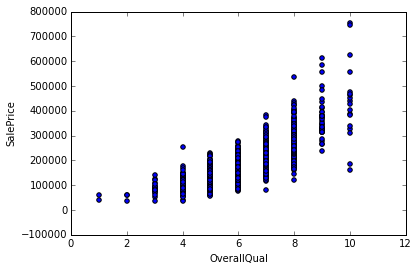

In [5]:
train.plot(x='OverallQual', y='SalePrice', kind='scatter')

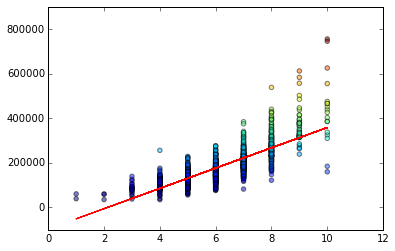

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
quality = train.OverallQual.reshape(-1,1)
reg.fit(quality, train.SalePrice)
plt.plot(quality, reg.predict(quality), color='red', linewidth=1)
plt.scatter(quality, train.SalePrice, alpha=0.5, c=train.SalePrice)
plt.xlabel = 'Overall Quality'
plt.ylabel = 'Sale Price'
plt.show()

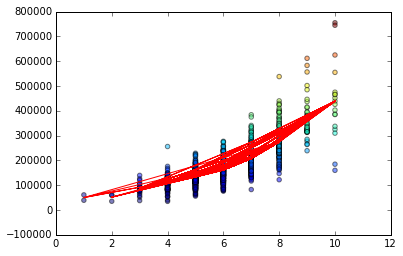

In [7]:
# Do the same as above with a DecisionTreeRegressor
reg = DecisionTreeRegressor()
quality = train.OverallQual.reshape(-1,1)
reg.fit(quality, train.SalePrice)
plt.plot(quality, reg.predict(quality), color='red', linewidth=1)
plt.scatter(quality, train.SalePrice, alpha=0.5, c=train.SalePrice)
plt.xlabel = 'Overall Quality'
plt.ylabel = 'Sale Price'
plt.show()

In [14]:
# make first submission using the DecisionTreeRegressor
test_quality = test.OverallQual.reshape(-1,1)
DTRegressor = reg.predict(test_quality)
test_id = test.Id
DTR_submission = pd.DataFrame(data=DTRegressor, index=test_id, columns=['SalePrice'])
DTR_submission.head()
DTR_submission.to_csv('DTR_submission1.csv')

To dos:
1. include the scoring function (ln 29)
2.  cross validation (ln 31)
3. plot the learning curves (ln 32)
4. plot the complexity curves (ln 33)
5. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(quality, prices, test_size = 0.2, random_state = 9)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


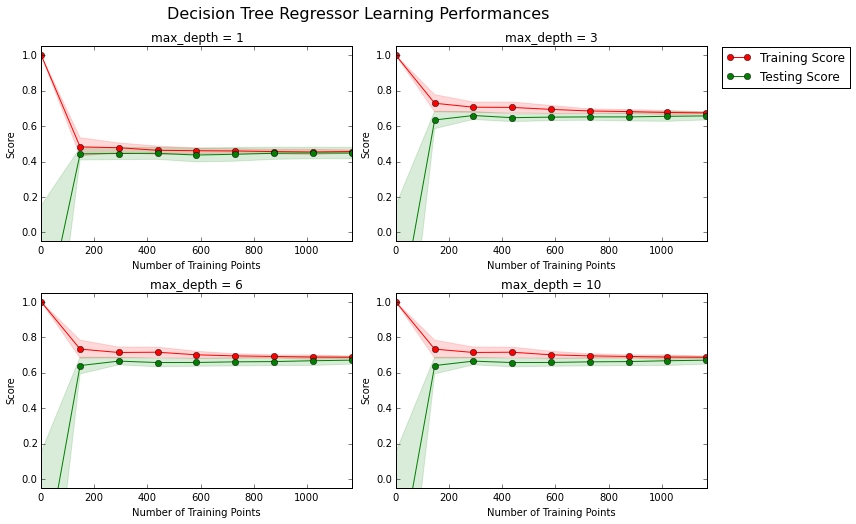

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(quality, prices)

TypeError: 'str' object is not callable

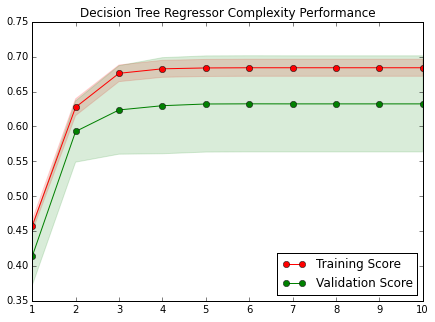

In [18]:
vs.ModelComplexity(X_train, y_train)

In [36]:
# Make a DTR with all the numeric data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_numeric = train.select_dtypes(include=numerics)
train_numeric = train_numeric.dropna(axis=1)
test_numeric = test.select_dtypes(include=numerics)
test_numeric = test_numeric.dropna(axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_numeric, prices, test_size = 0.2, random_state = 9)

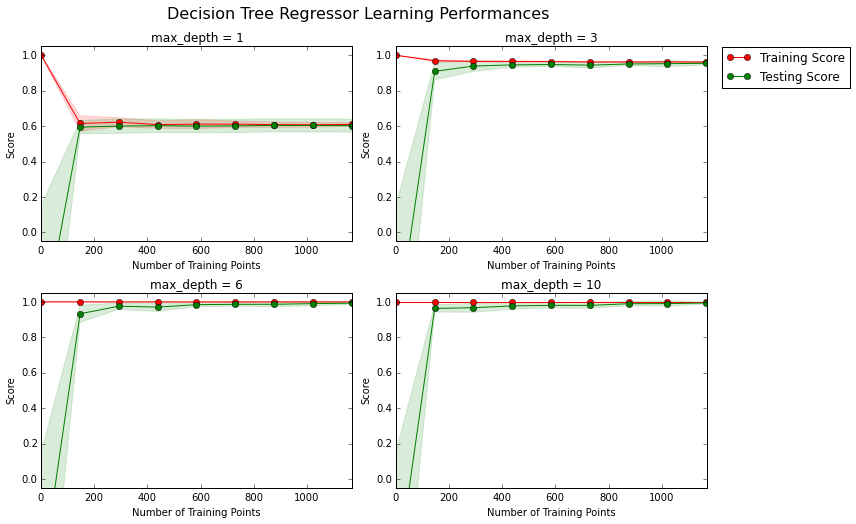

In [32]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(train_numeric, prices)

TypeError: 'str' object is not callable

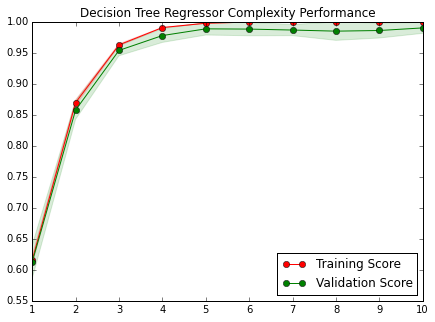

In [33]:
vs.ModelComplexity(X_train, y_train)

In [37]:
reg3 = DecisionTreeRegressor(max_depth=10)
reg3.fit(train_numeric, prices)
DTRegressor3 = reg3.predict(test_numeric)
test_id = test.Id
DTR_submission = pd.DataFrame(data=DTRegressor3, index=test_id, columns=['SalePrice'])
DTR_submission.head()
DTR_submission.to_csv('DTR_submission3.csv')

ValueError: Number of features of the model must match the input. Model n_features is 35 and input n_features is 26 